### Clustering


El clustering es un algoritmo de aprendizaje no supervisado. Este tiene como abjetivo agrupar distintos datos dentro de grupos que compartan características similares.
Dentro del clustering tenemos distintos tipos de algortimos:

Algoritmos basados en distancias.

Métodos basados en densidad y mallado.

![](https://datascience.eu/wp-content/uploads/2019/12/Screenshot-2020-10-17-at-13.30.08-978x652.png)

### El algoritmo K-Means
A continuación describimos el algoritmo con respecto a la función de distancia euclidiana $d(x, y) =\| x - y\|$. El objetivo es encontrar los centroides de los clusters y la etiqueta de cada dato correspondería al centroide mas cercano a ese dato.


**Algoritmo K-Means:**

entrada:$X\subset \mathbb{R}^{n}$; Número de clústers $K$
 
inicializar:Escoger aleatoriamente centroides iniciales $\boldsymbol{\mu_1}, \dots, \boldsymbol{\mu_k}$

repetir hasta convergencia:
$$\quad \forall i \in [k]\, fijemos\, C_i = \{ \boldsymbol{x} \in X: i = argmin_j \| \boldsymbol{x} - \boldsymbol{\mu_j}\|\}$$

romper empates de alguna manera arbitraria)
$$\forall i \in [k]\, actualizar\, \boldsymbol{\mu_i} = \frac{1}{|C_i|}\sum_{\boldsymbol{x} \in C_i} \boldsymbol{x}$$


En resumen, el algoritmo recibe como entrada el conjunto de datos $X$ y el número de clústers $k$; 1. el algoritmo comienza escogiendo los centroides (centros) de cada clúster de forma aleatoria, 2. posteriormente calcula la distancia de los elementos de $X$ a los centros de cada clúster, y se agrupa a los elementos dentro del clúster al que la distancia del elemento al centro del clúster sea la menor, 3. finalmente actualiza el centro del clúster como el centroide del cluster (se podría ver como la media). El paso 2 y 3 se repiten hasta convergencia, es decir, que los centros ya no cambien o varien por una cantidad muy pequeña.



Este algoritmo busca minimizar una cantidad conocida como "inertia", la cual está dada por:
$$\sum_{i=0}^n \min_{\mu_j \in C} ||x_i-\mu_j||^2$$

## Selección del número óptimo de clústers

### Método del codo.

![](https://media.geeksforgeeks.org/wp-content/uploads/20190606105550/distortion1.png)

### Usando Scikit-Learn

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = dataset.iloc[:,[2,3,4]].values

In [6]:
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

<IPython.core.display.Javascript object>


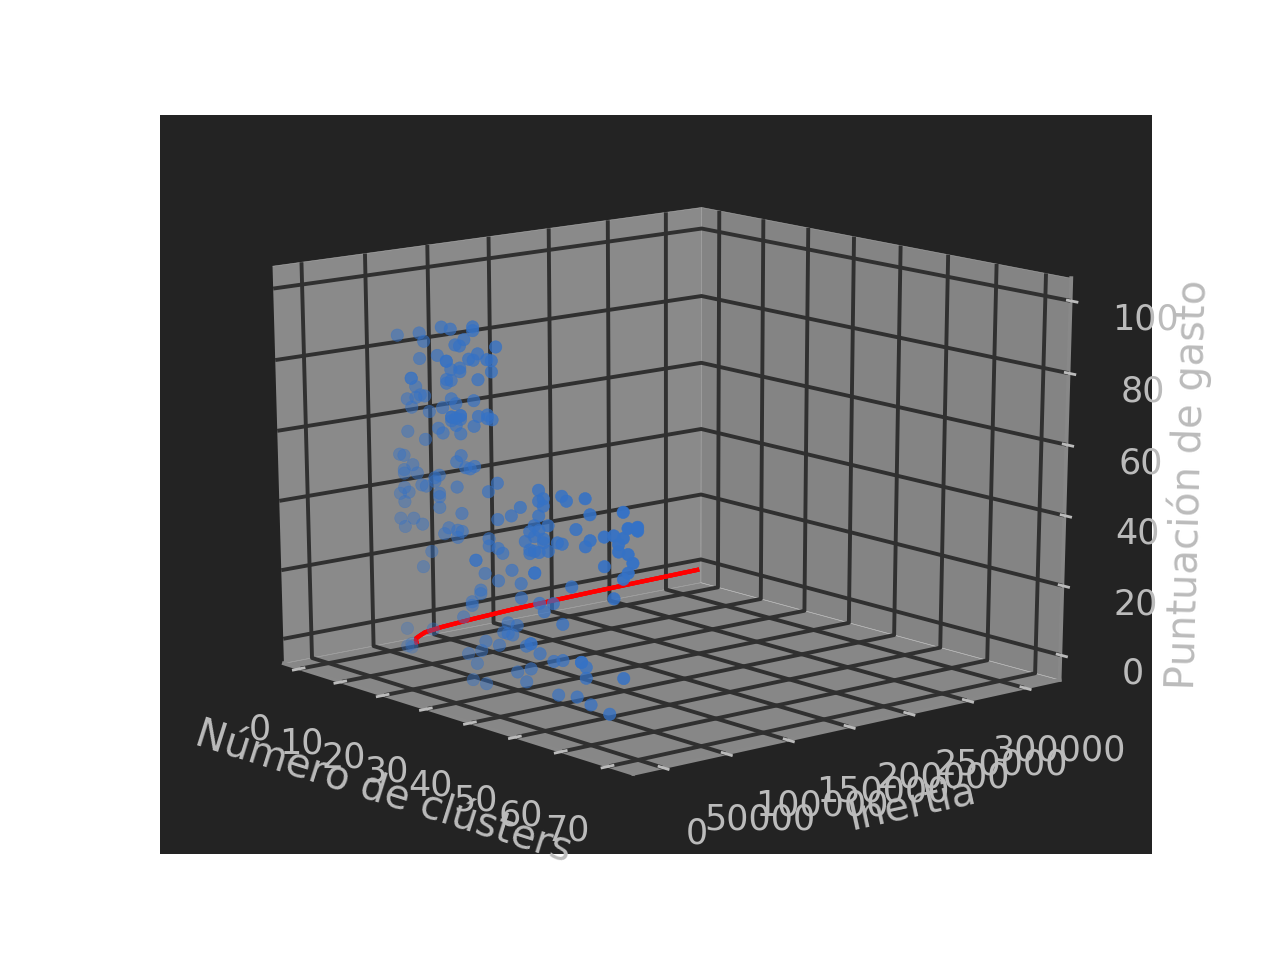

Text(0.5, 0, 'Puntuación de gasto')

In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2])
ax.set_xlabel("Edad")
ax.set_ylabel("Ingreso Anual")
ax.set_zlabel("Puntuación de gasto")


In [32]:
inertias = []
n_c = [i for i in range(1,8)]

In [33]:
n_c

[1, 2, 3, 4, 5, 6, 7]

In [8]:
from sklearn.cluster import KMeans

In [35]:
for i in n_c:
    mod = KMeans(n_clusters=i)
    mod.fit(X)
    inertias.append(mod.inertia_)

In [36]:
inertias

[308812.78,
 212840.16982097185,
 143342.751571706,
 104366.15145556198,
 75350.77917248776,
 58300.44332159069,
 51084.50595493436]

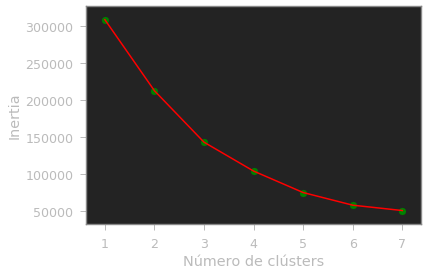

In [37]:
%matplotlib inline
plt.plot(n_c,inertias, c="red")
plt.scatter(n_c, inertias, c="green")
plt.xlabel("Número de clústers")
plt.ylabel("Inertia")
plt.show()

In [9]:
mod_km = KMeans(n_clusters=3, random_state=0)

In [10]:
mod_km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [11]:
etiquetas = mod_km.predict(X)

In [12]:
etiquetas

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [13]:
def colores(y):
    c=[]
    for i in y:
        if i==0:
            c.append("red")
        elif i==1:
            c.append("green")
        else:
            c.append("yellow")
    return c 
            

In [14]:
mc = colores(etiquetas)

In [15]:
mc 

['yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',

<IPython.core.display.Javascript object>


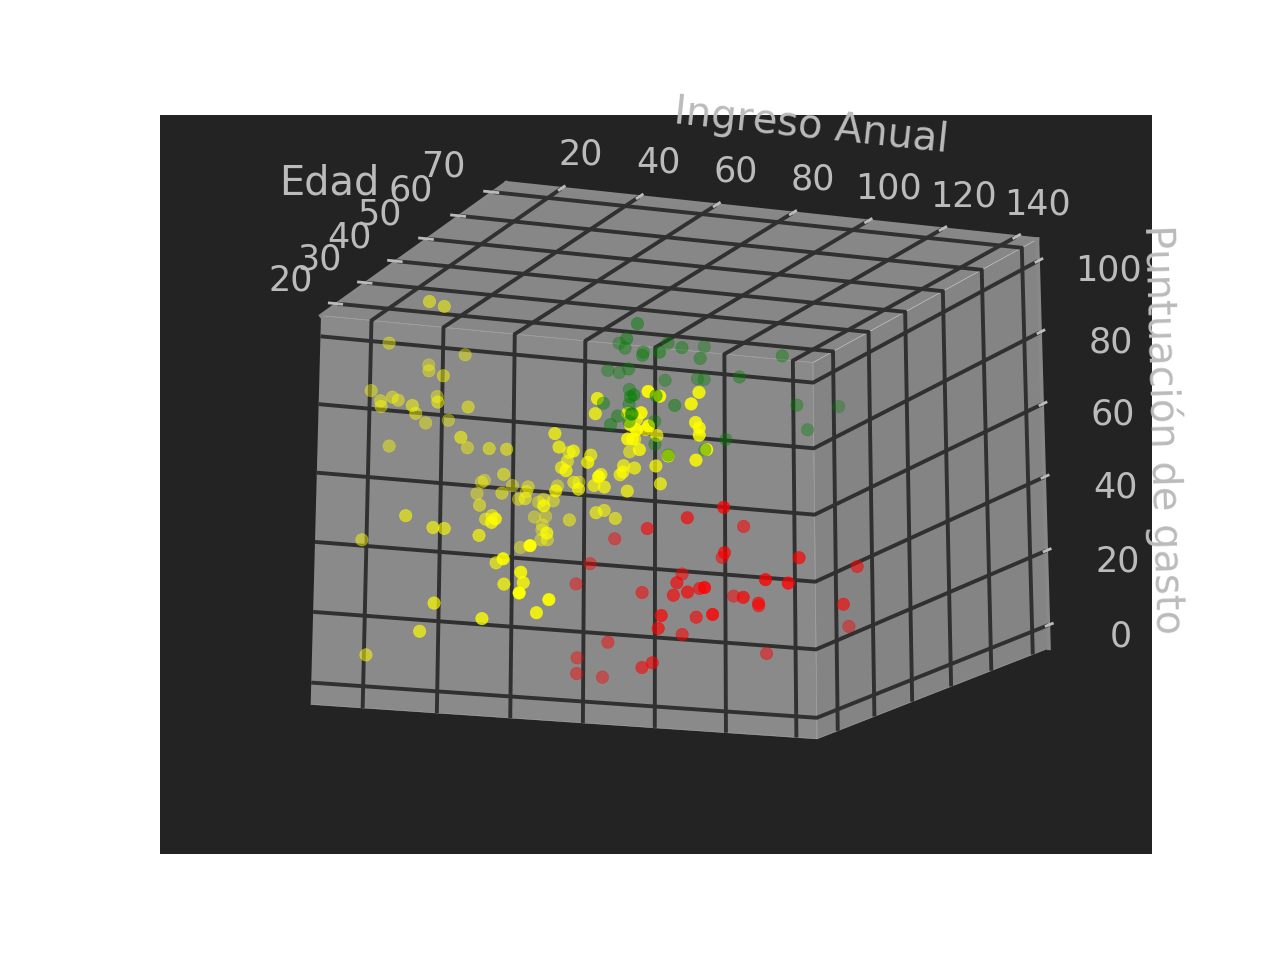

Text(0.5, 0, 'Puntuación de gasto')

In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2], c= mc)
ax.set_xlabel("Edad")
ax.set_ylabel("Ingreso Anual")
ax.set_zlabel("Puntuación de gasto")